In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import ot
from sample_generator import sample_generation
from trend_decompose import l1filter
from robustOPW import get_prob,res2prob
from utils import visualize
import seaborn as sns
from algo import *

In [2]:
def ot_uniform_prior(y1,y2):
    dis1, T1 = t_opw1(y1.reshape(-1,1), y2.reshape(-1,1))
    dis2, T2 = t_opw2(y1.reshape(-1,1), y2.reshape(-1,1))
    dis3, T3 = opw(y1.reshape(-1,1), y2.reshape(-1,1))
    dis4, T4 = tcot(y1.reshape(-1,1), y2.reshape(-1,1), ld=2)

    fig, ax = plt.subplots(2,2,figsize=(15,15))

    cmap="YlGnBu"

    sns.heatmap(T1, ax=ax[0,0], cmap=cmap)
    sns.heatmap(T2, ax=ax[0,1], cmap=cmap)
    sns.heatmap(T3, ax=ax[1,0], cmap=cmap)
    sns.heatmap(T4, ax=ax[1,1], cmap=cmap)

    ax[0,0].set_title("t_opw1")
    ax[0,1].set_title("t_opw2")
    ax[1,0].set_title("opw")
    ax[1,1].set_title("tcot")

    plt.show()

    print("Cost of t_opw1: ",dis1)
    print("Cost of t_opw2: ",np.sum(T2 * ot.dist(y1.reshape(-1,1), y2.reshape(-1,1), metric='euclidean')))
    print("Cost of opw: ",dis3)
    print("Cost of tcot: ",dis4)

    
def ot_posterior(y1,y2):
    y1_prob, y2_prob = get_prob(y1,y2)
    dis1, T1 = t_opw1(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob)
    dis2, T2 = t_opw2(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob)
    dis3, T3 = opw(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob)
    dis4, T4 = tcot(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob, ld=2)

    fig, ax = plt.subplots(2,2,figsize=(15,15))

    cmap="YlGnBu"

    sns.heatmap(T1, ax=ax[0,0], cmap=cmap)
    sns.heatmap(T2, ax=ax[0,1], cmap=cmap)
    sns.heatmap(T3, ax=ax[1,0], cmap=cmap)
    sns.heatmap(T4, ax=ax[1,1], cmap=cmap)

    ax[0,0].set_title("t_opw1")
    ax[0,1].set_title("t_opw2")
    ax[1,0].set_title("opw")
    ax[1,1].set_title("tcot")

    plt.show()

    print("Cost of t_opw1: ",dis1)
    print("Cost of t_opw2: ",dis2)
    print("Cost of opw: ",dis3)
    print("Cost of tcot: ",dis4)

In [3]:

data = pd.read_csv('data/data.csv')
data.head()

,x,y1,y2
0,0,0.1,0.100002
1,1,0.1,0.100004
2,2,0.1,0.100006
3,3,0.1,0.100010
4,4,0.1,0.100016


# Khi chưa add noise

In [4]:
y1 = data["y1"].values
y2 = data["y2"].values
# y1[40]+=0.5d

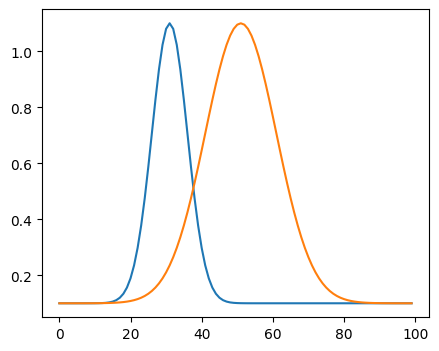

In [5]:
plt.figure(figsize = (5,4))
plt.plot(y1, label="y1")
plt.plot(y2, label="y2")
plt.show()

In [6]:
y1_prob, y2_prob = get_prob(y1,y2)

In [7]:
y1_trend = l1filter(y1,0.5)
y2_trend = l1filter(y2,2)

y1_res = y1 - y1_trend
y2_res = y2 - y2_trend

y1_prob = res2prob(y1_res).reshape(-1,1)
y2_prob = res2prob(y2_res).reshape(-1,1)

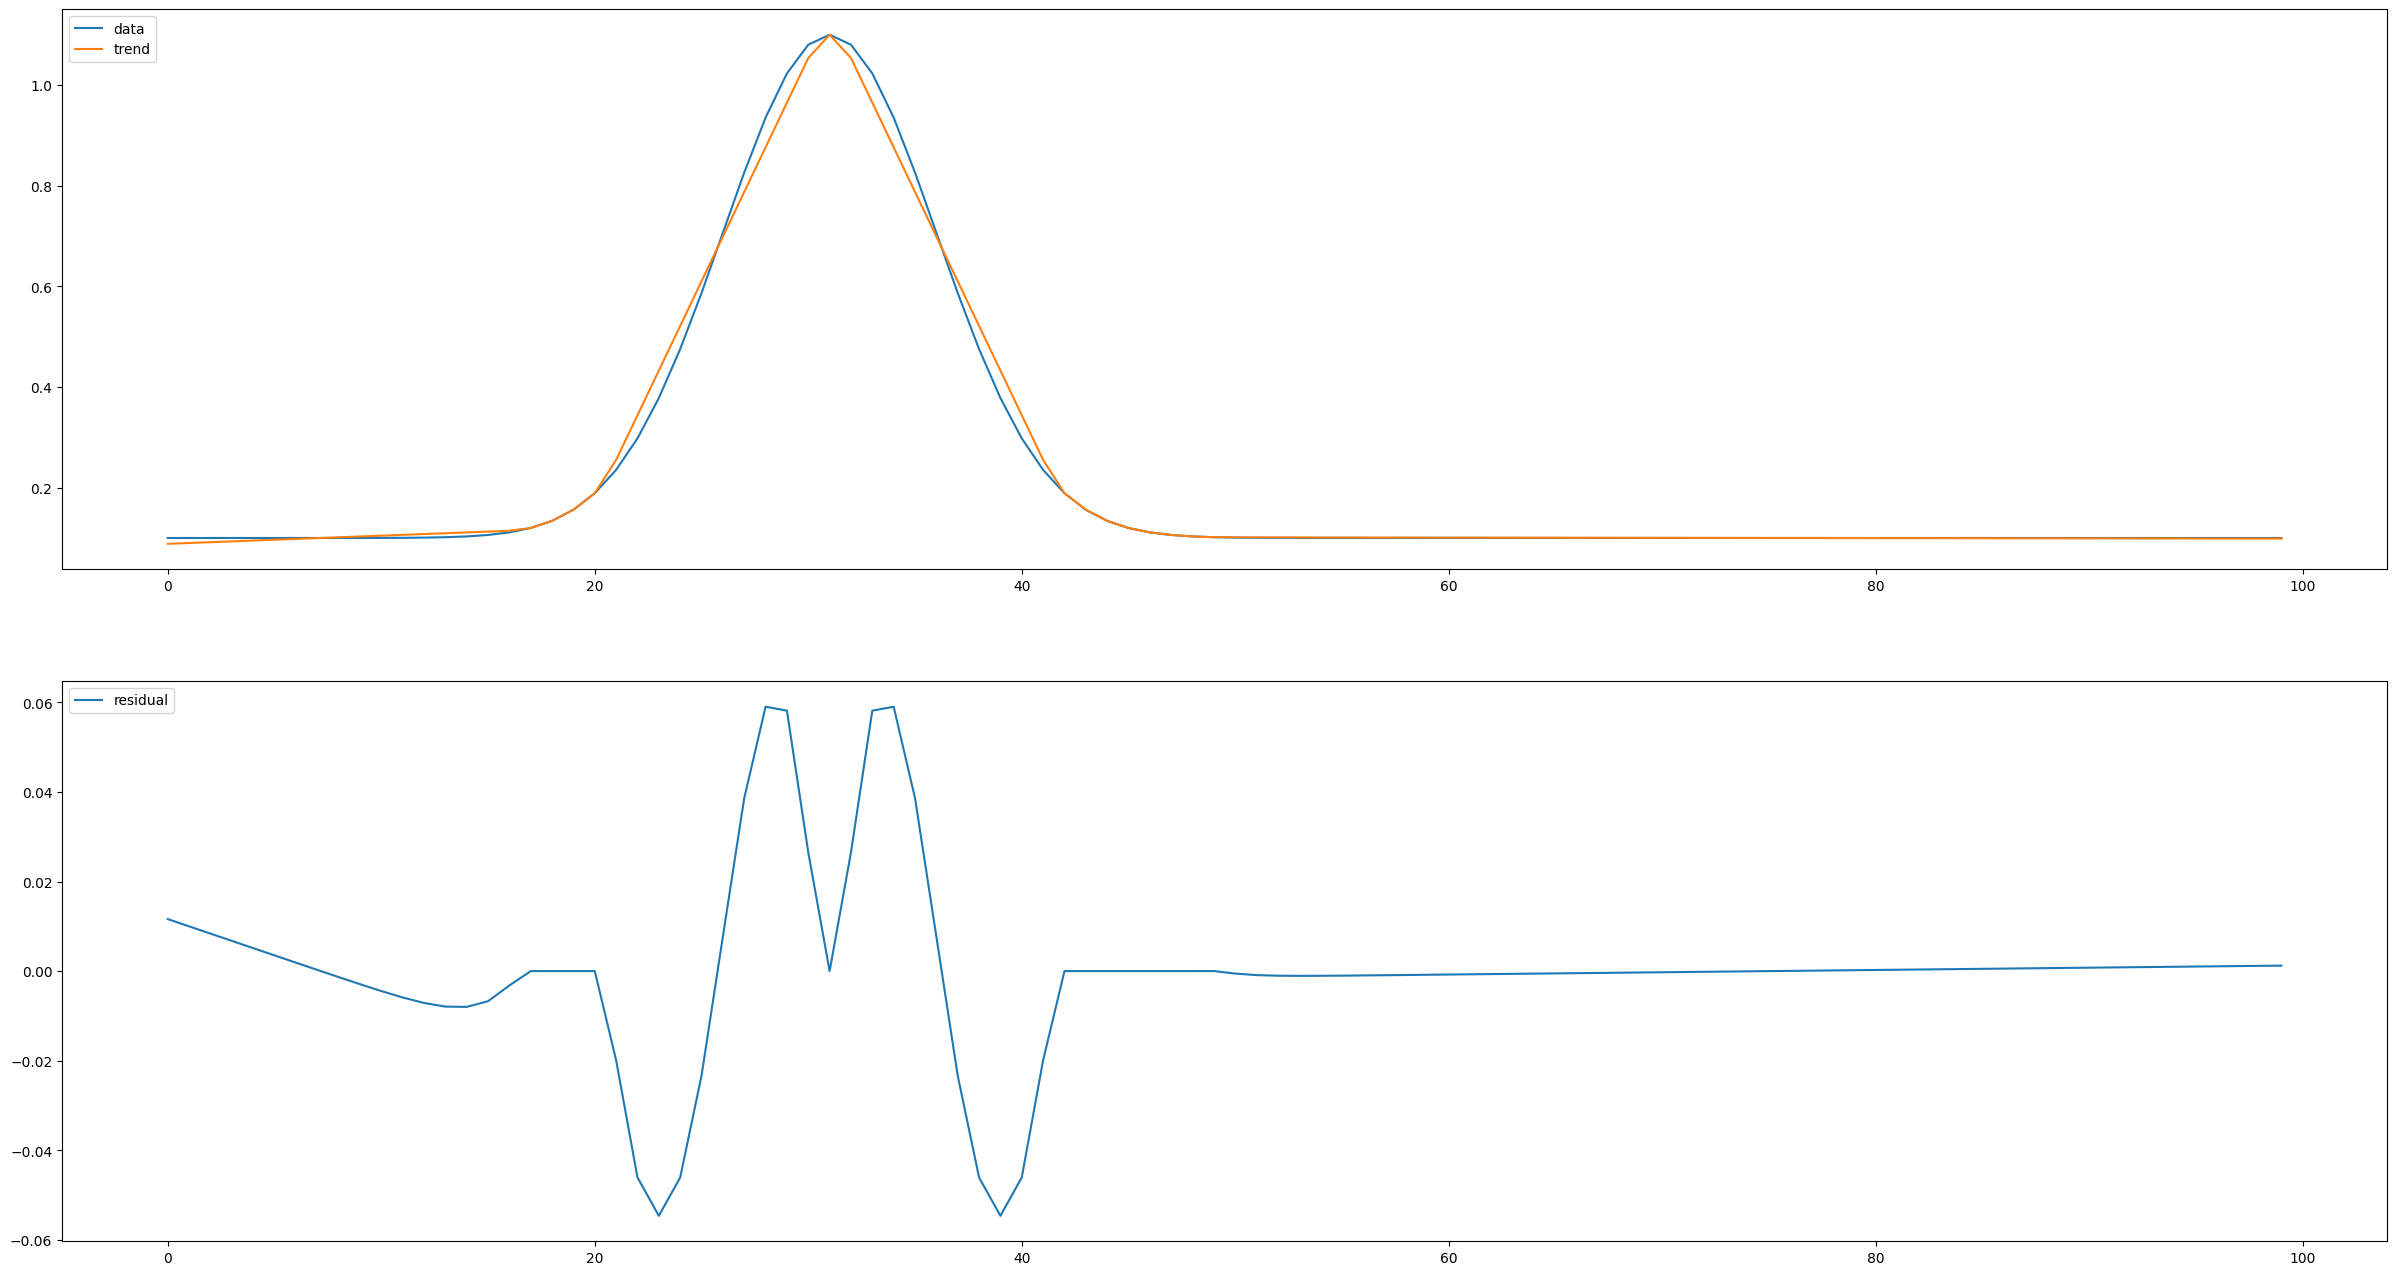

In [8]:

visualize(y1,y1_trend,threshold=0.3)

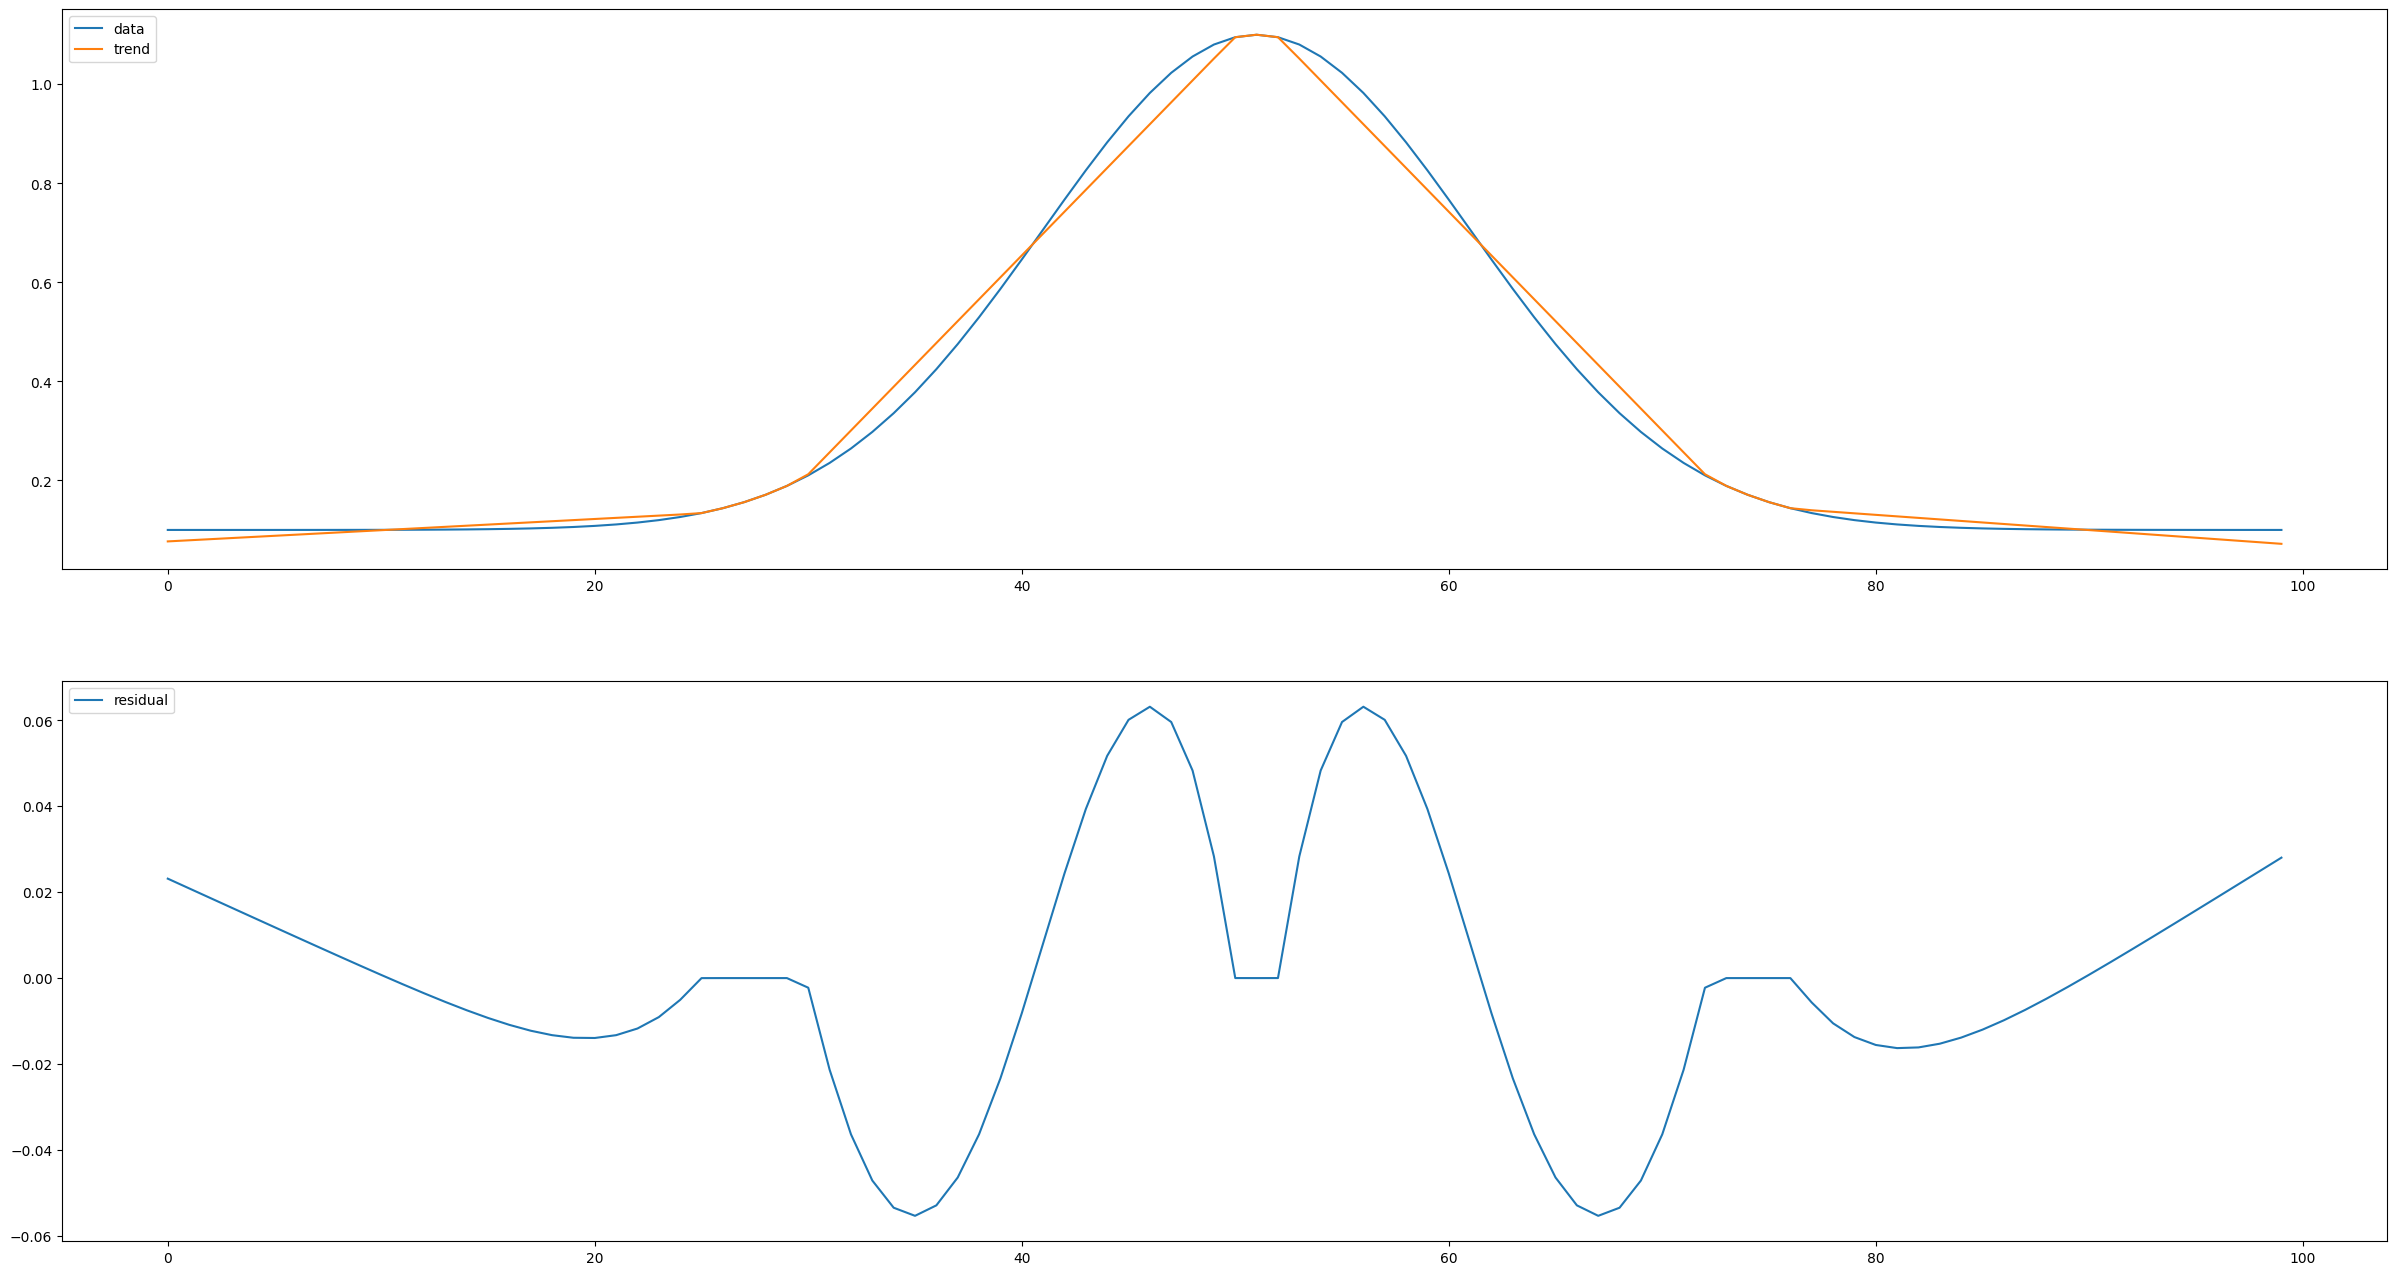

In [9]:
visualize(y2,y2_trend,threshold=0.3)

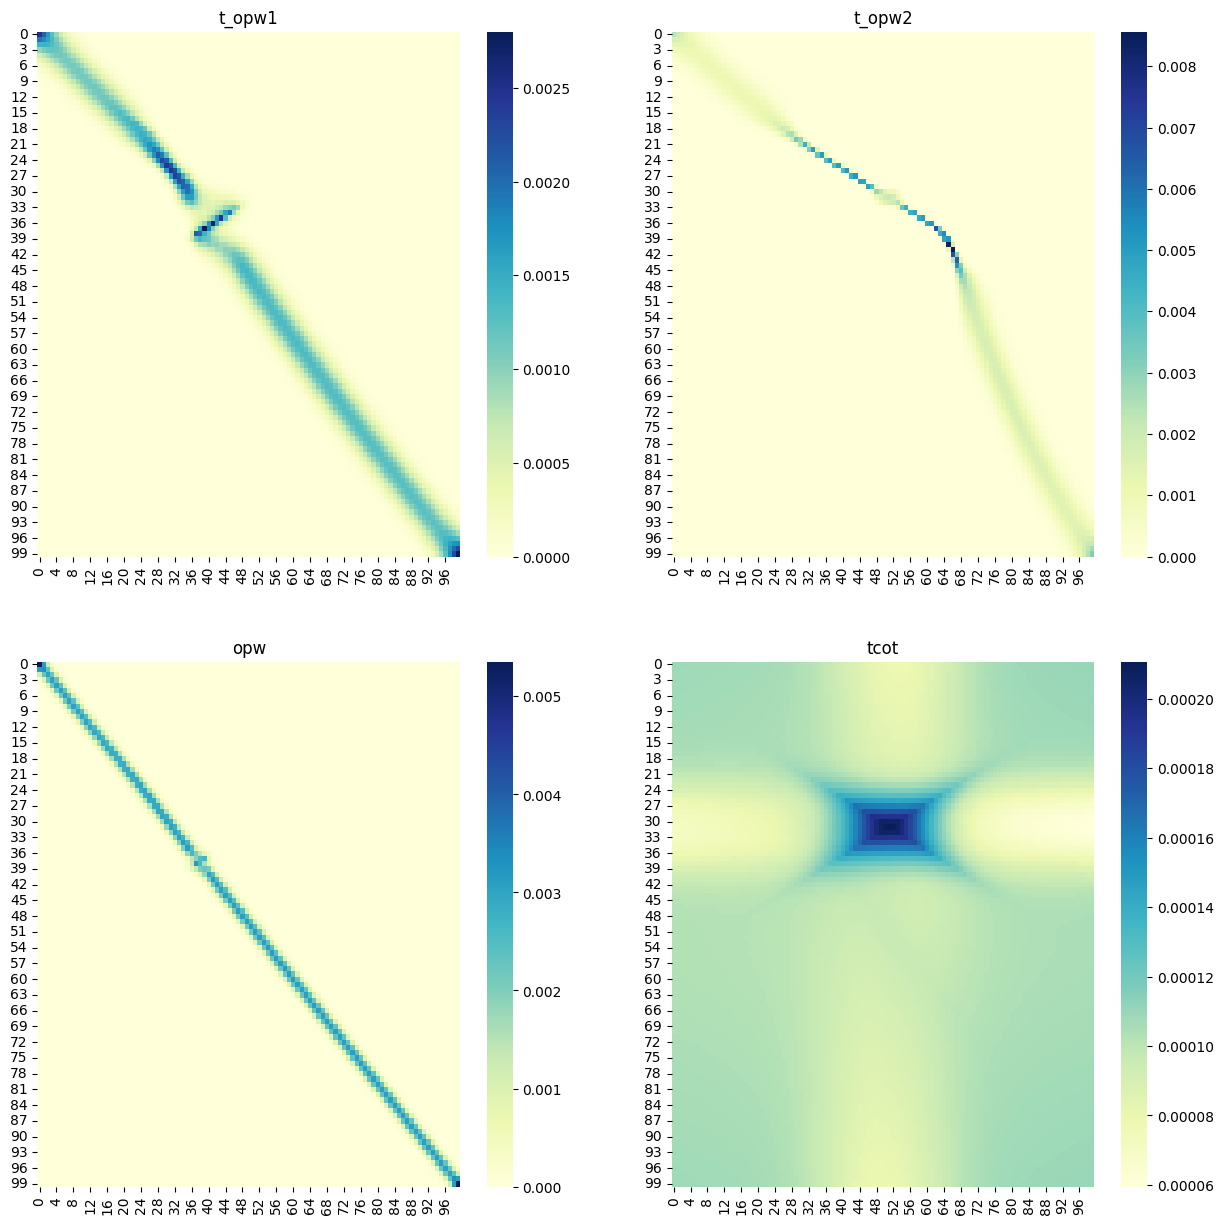

Cost of t_opw1:  0.2692525125790612
Cost of t_opw2:  0.04475583315073111
Cost of opw:  0.3051394824339035
Cost of tcot:  0.33933189247800805


In [10]:
ot_uniform_prior(y1,y2)

In [11]:
dis2, T2 = t_opw2(y1.reshape(-1,1), y2.reshape(-1,1))

In [12]:
np.sum(T2 * ot.dist(y1.reshape(-1,1), y2.reshape(-1,1), metric='euclidean'))

0.04475583315073111

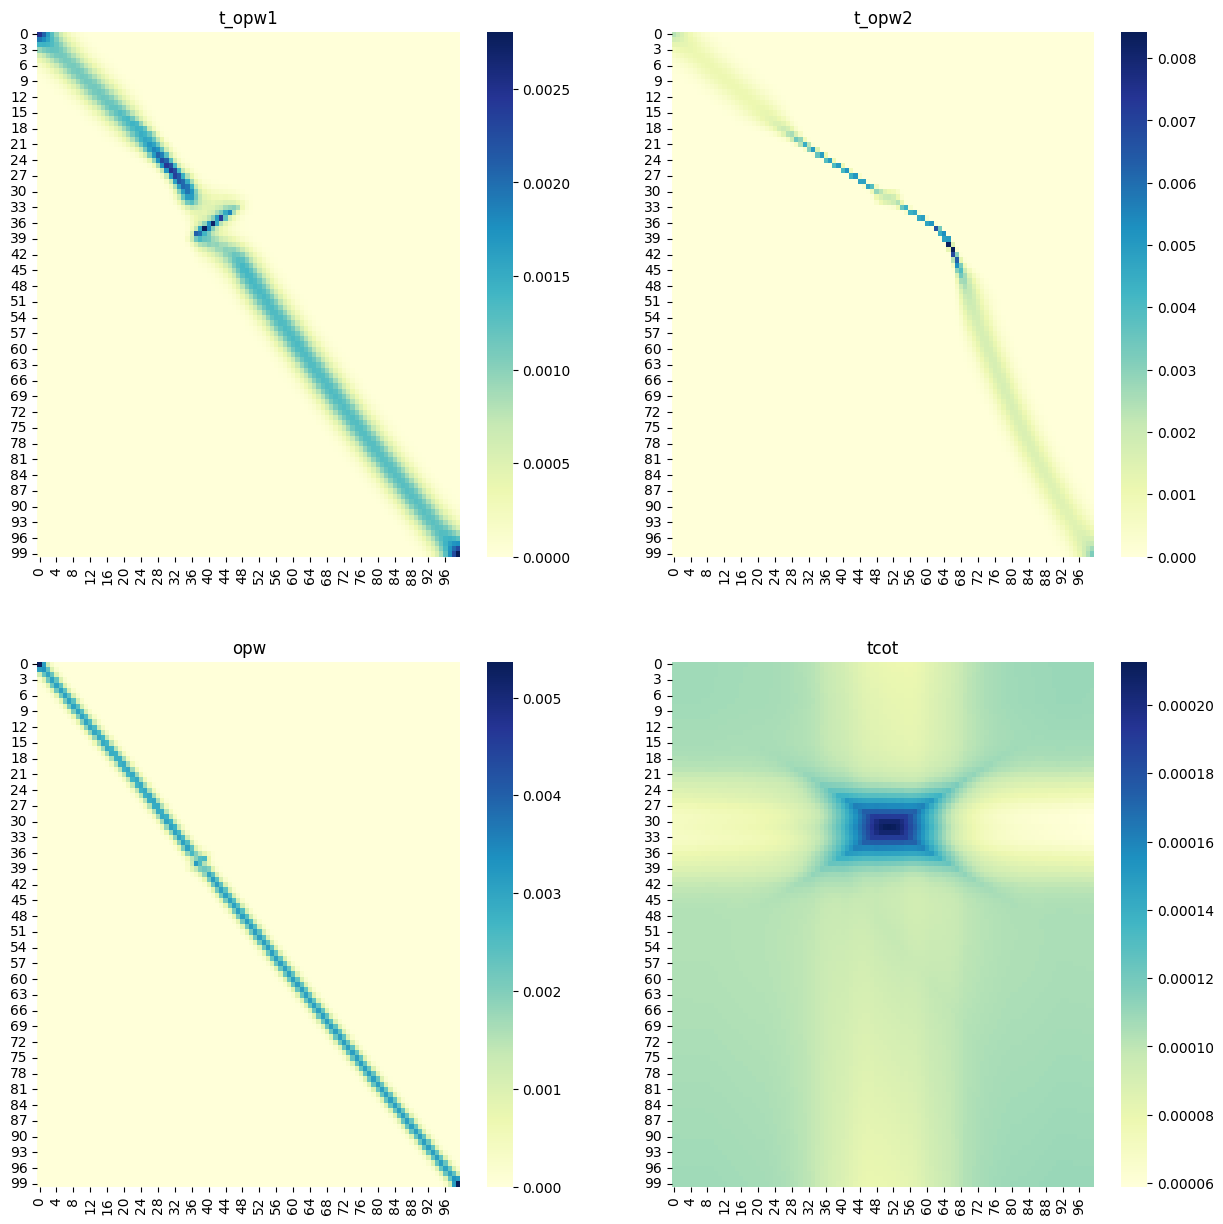

Cost of t_opw1:  0.2692880537988226
Cost of t_opw2:  0.04478719653894061
Cost of opw:  0.304534396177817
Cost of tcot:  0.3383588638775781


In [13]:
ot_posterior(y1,y2)

# sau khi add noise 

In [14]:

data = pd.read_csv('data/data.csv')
data.head()
y1 = data["y1"].values
y2 = data["y2"].values

# y1 = y1 * 100
# y2 = y2 * 100
y1[40]+=0.5
y1[50]+=0.5
y1[80]-=0.5


#set seed 
# np.random.seed(0)

# for i in range(5):
#     y1[np.random.randint(0,100)]+= np.random.uniform(0,y1.max() / 2) * np.random.choice([-1,1])
#     y2[np.random.randint(0,100)]+= np.random.uniform(0,y1.max() / 2) * np.random.choice([-1,1])

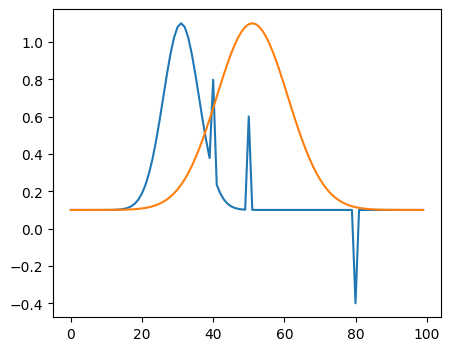

In [15]:
plt.figure(figsize = (5,4))
plt.plot(y1, label="y1")
plt.plot(y2, label="y2")
plt.show()

In [16]:
y1_prob, y2_prob = get_prob(y1,y2)

In [17]:
y1_trend = l1filter(y1,0.5)
y2_trend = l1filter(y2,2)

y1_res = y1 - y1_trend
y2_res = y2 - y2_trend

y1_prob = res2prob(y1_res).reshape(-1,1)
y2_prob = res2prob(y2_res).reshape(-1,1)

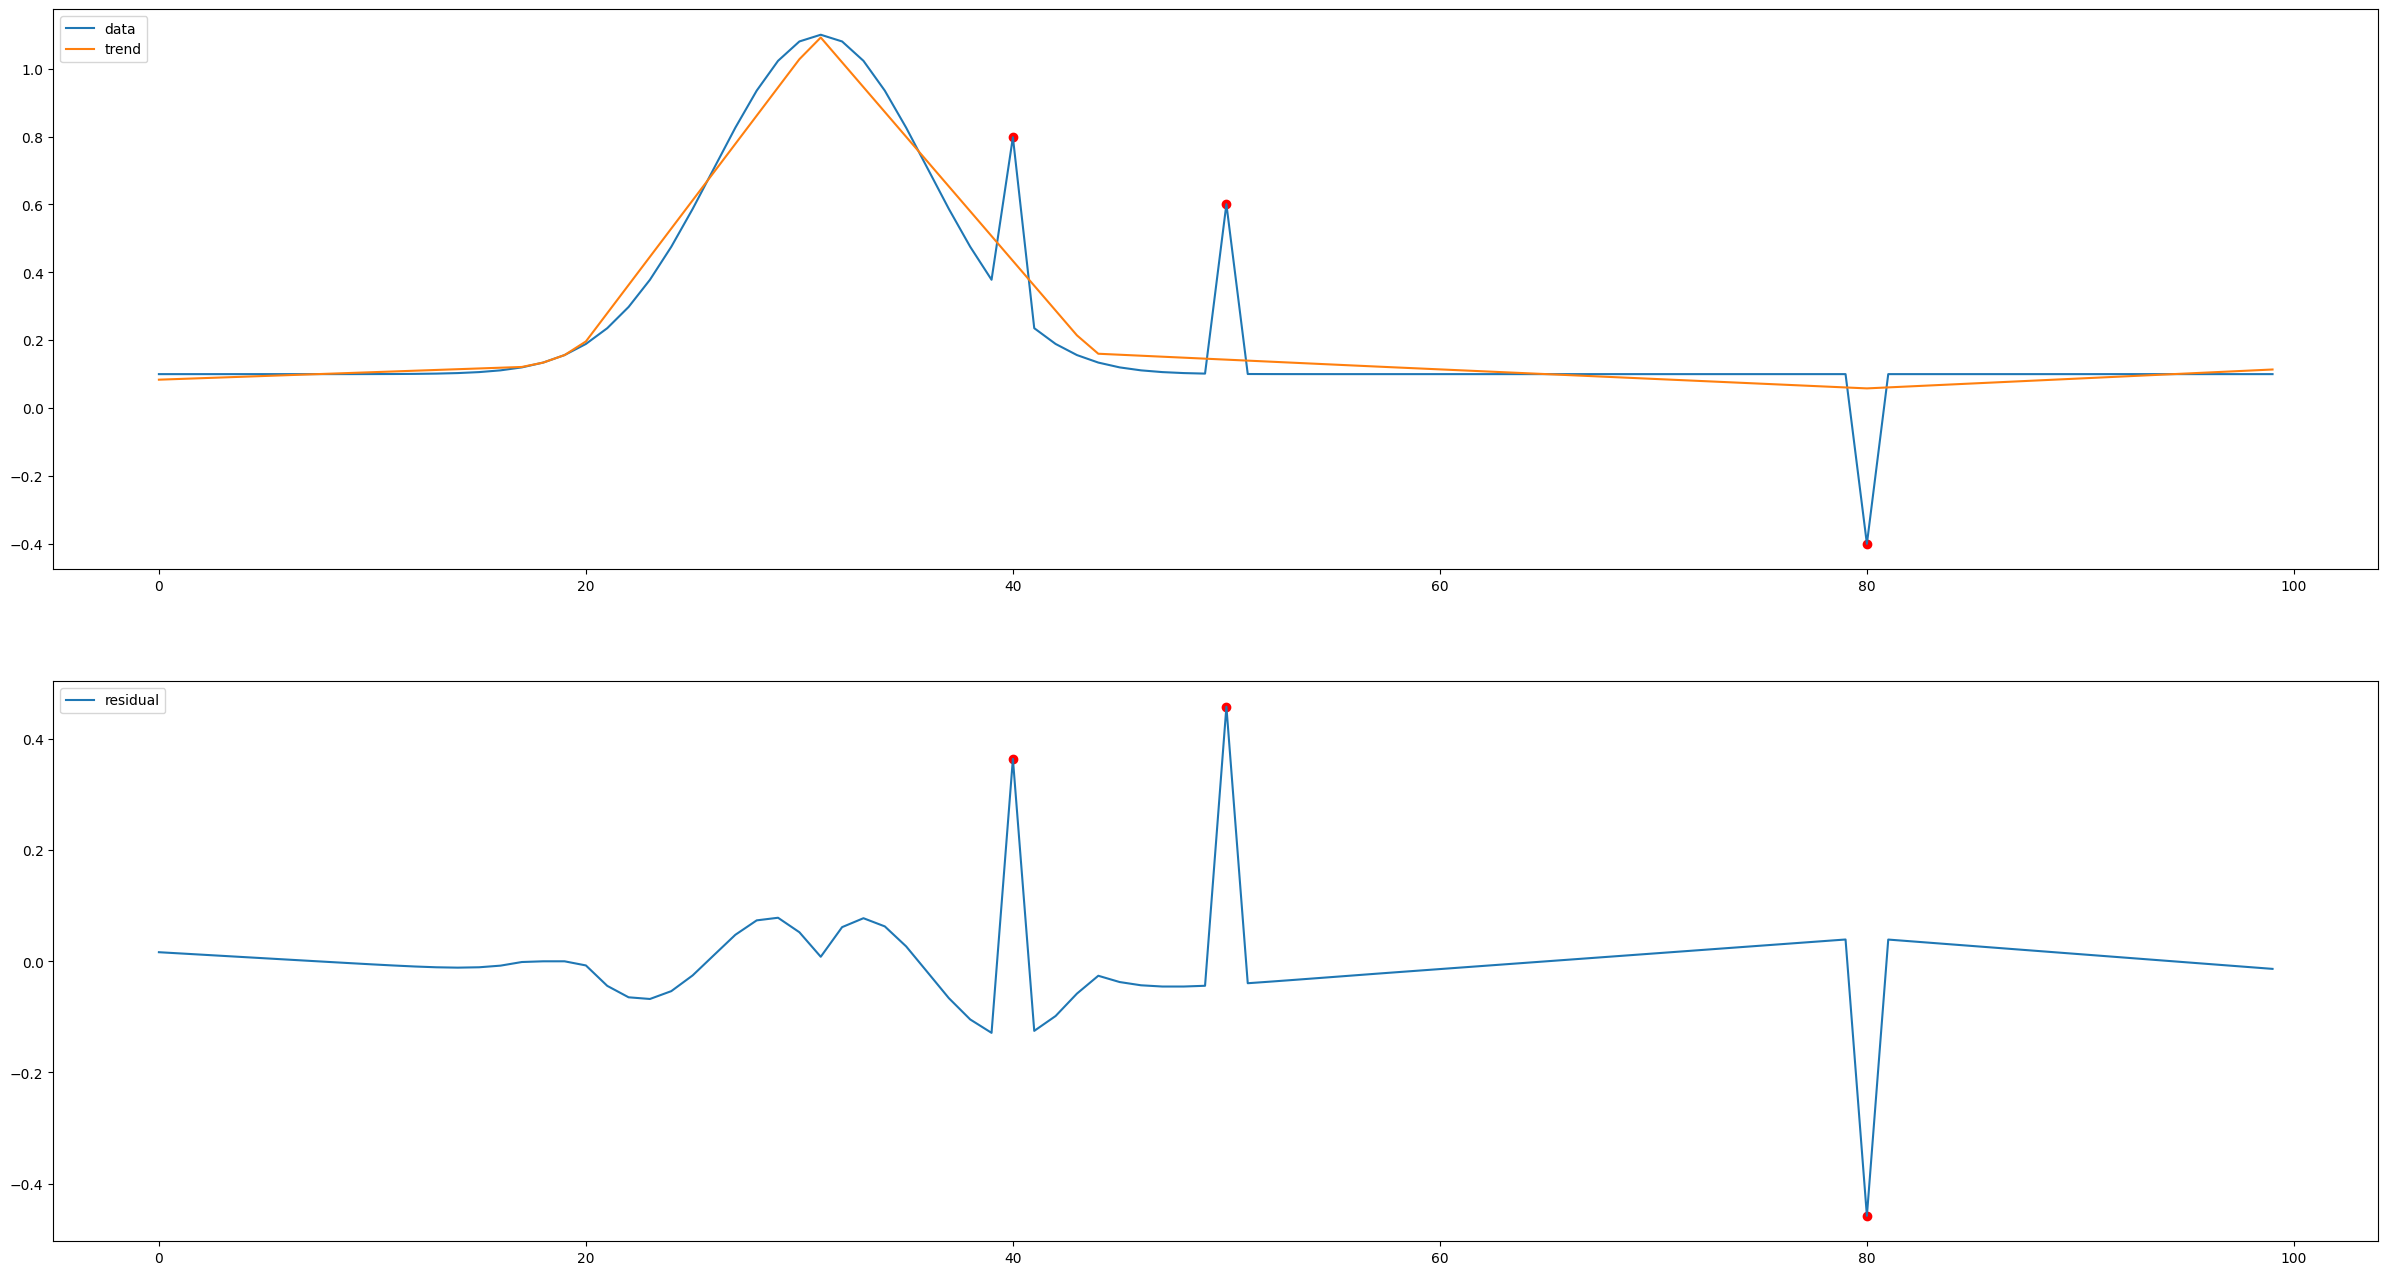

In [18]:

visualize(y1,y1_trend,threshold=0.3)

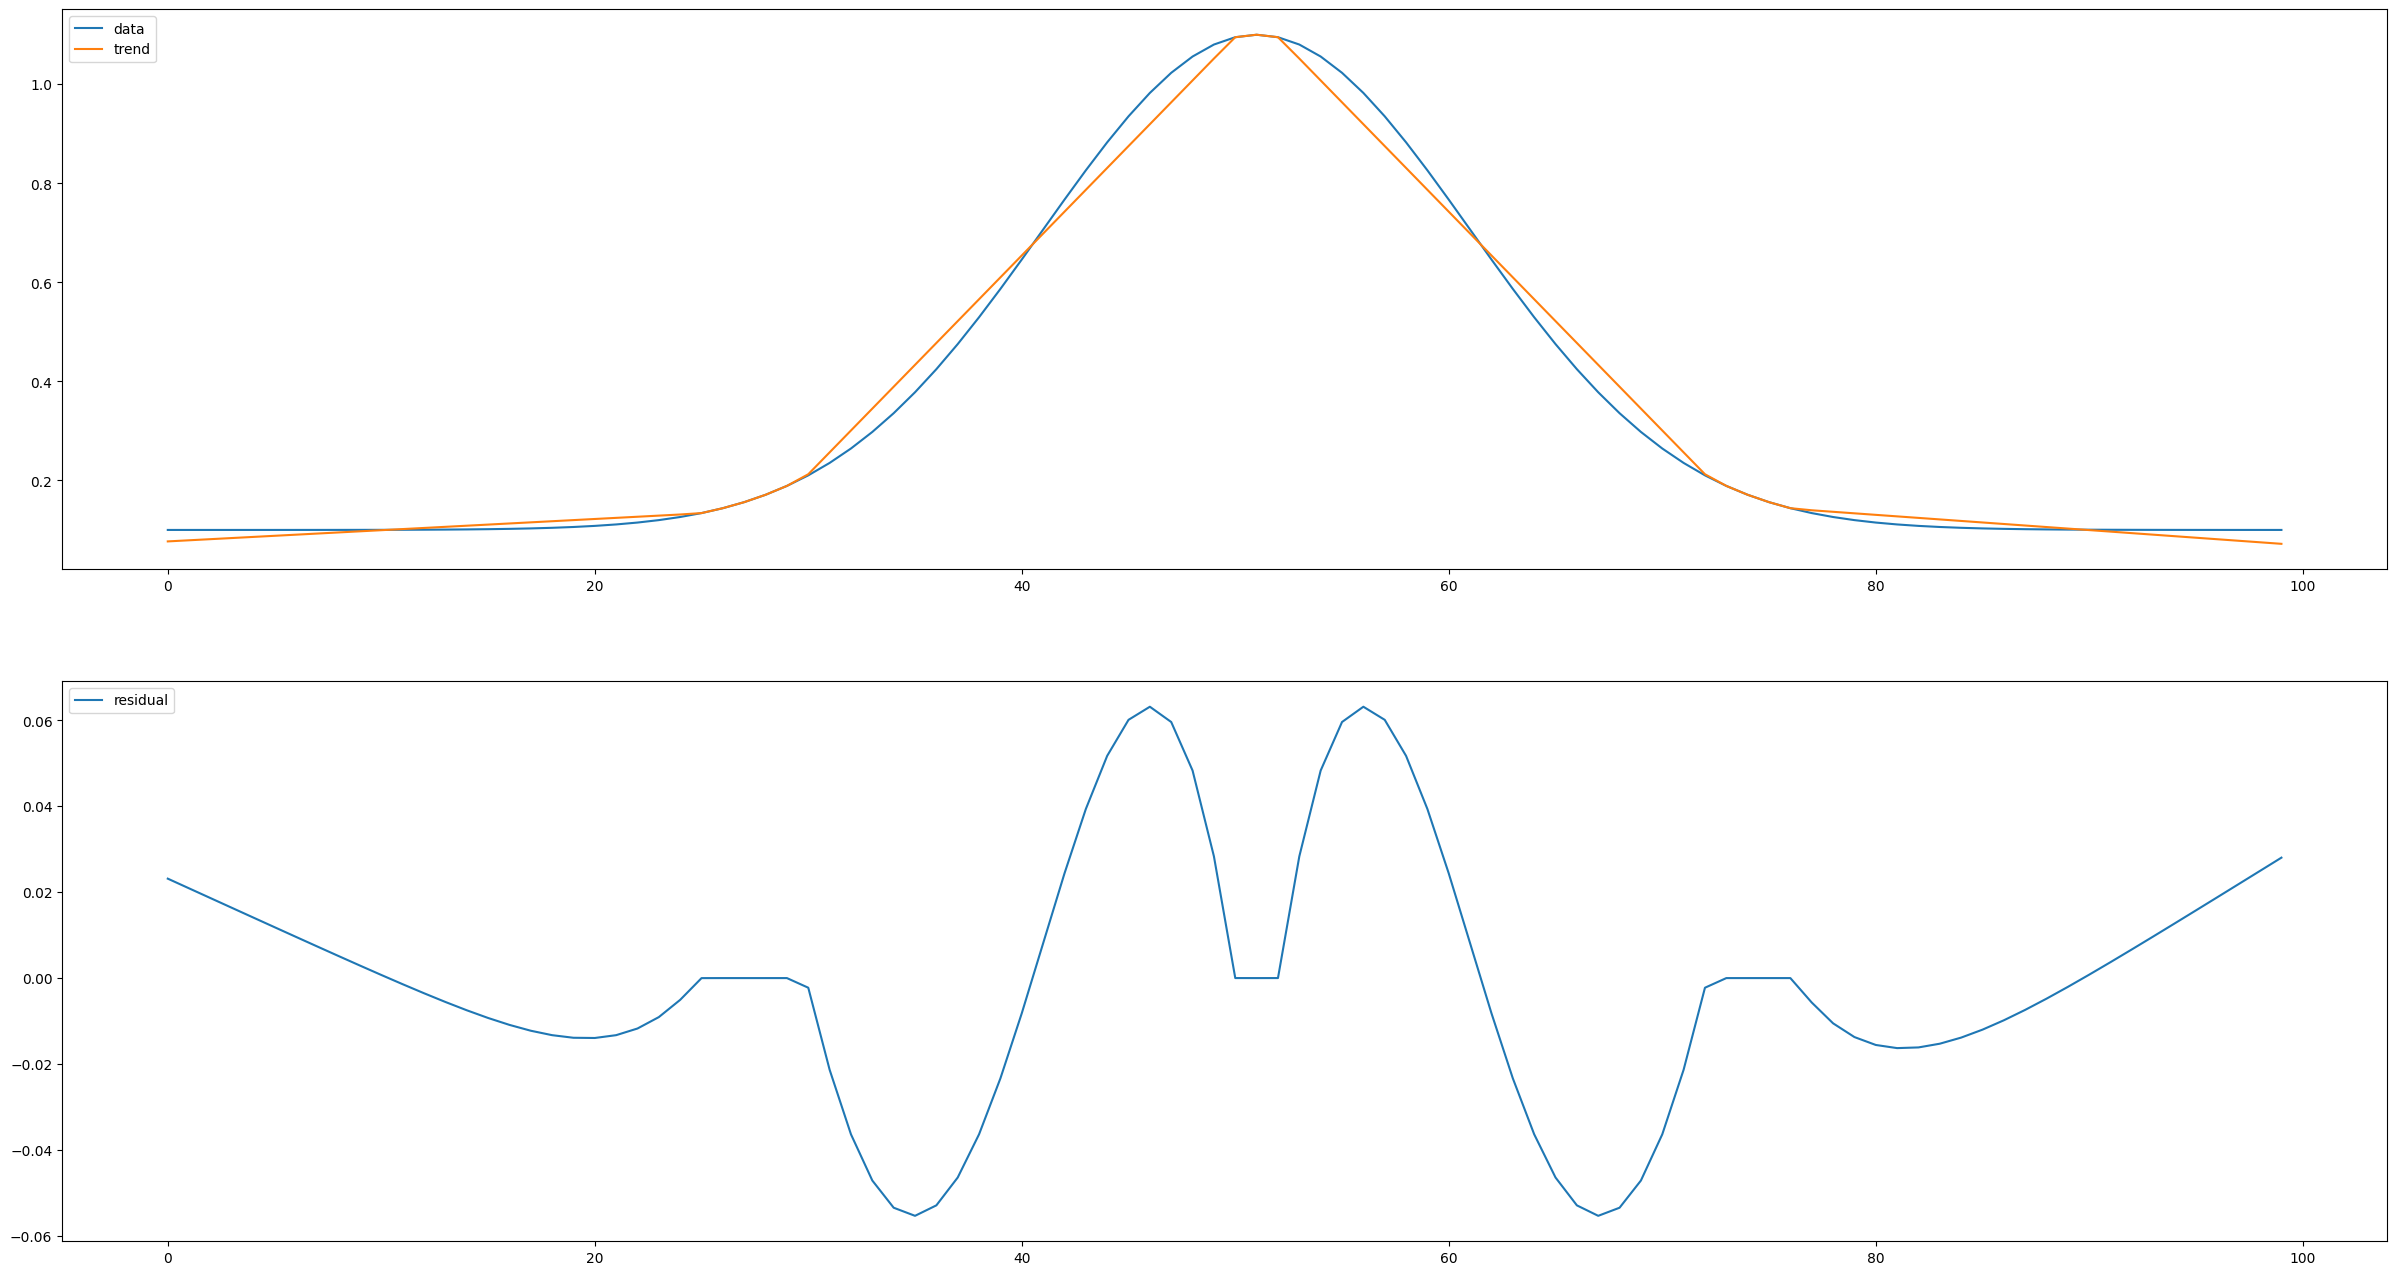

In [19]:
visualize(y2,y2_trend,threshold=0.3)

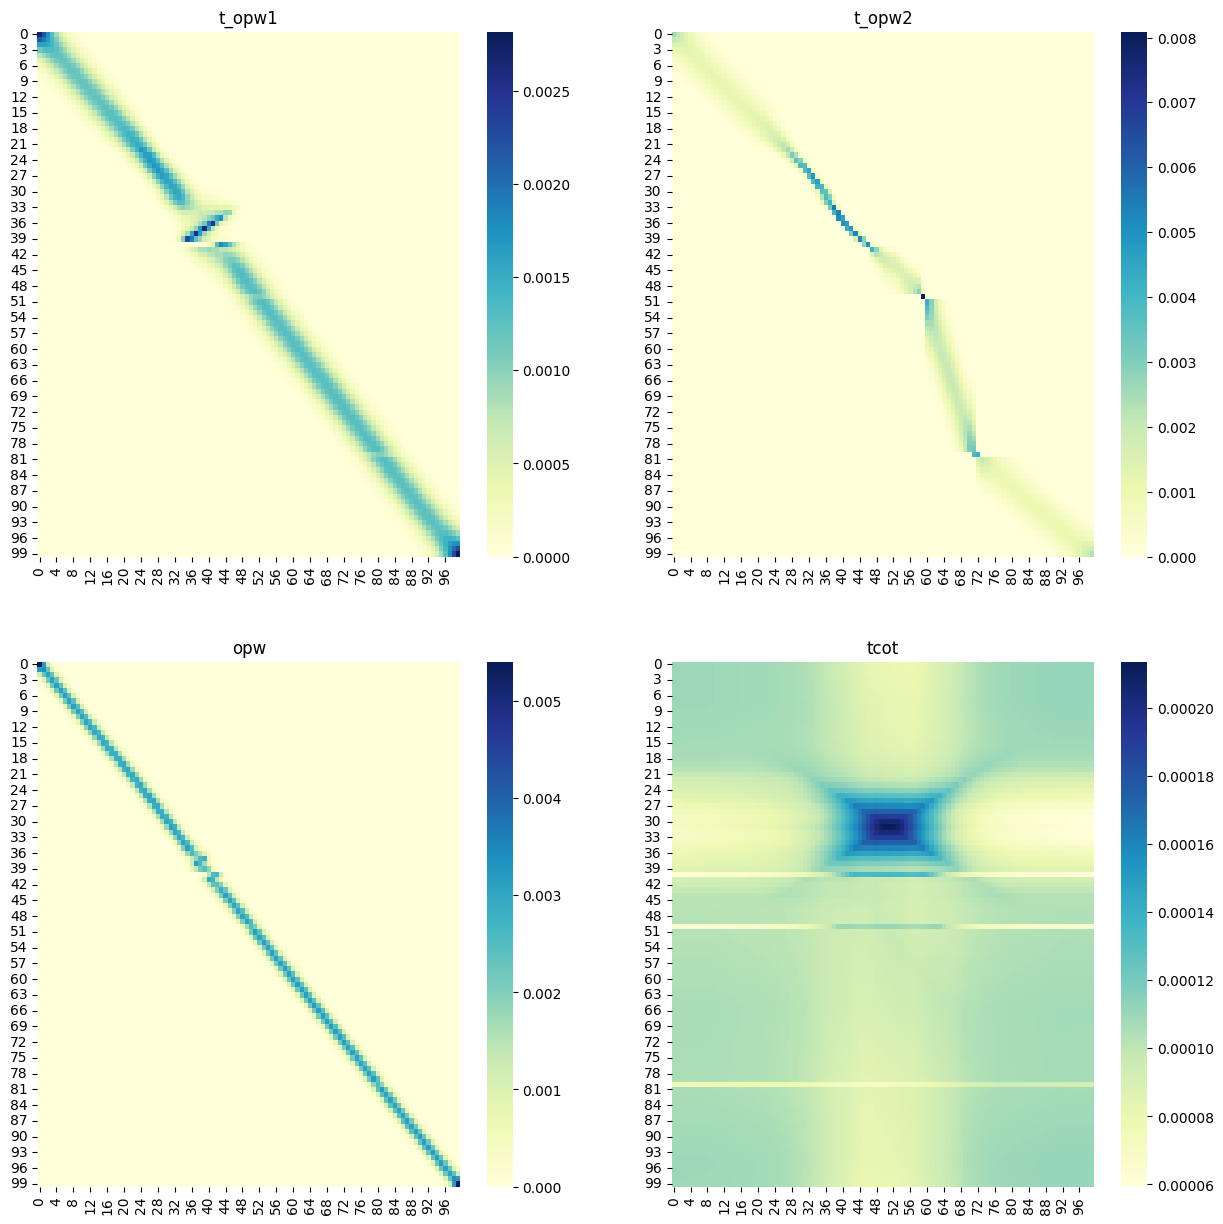

Cost of t_opw1:  0.27690901265133105
Cost of t_opw2:  0.2777976179057261
Cost of opw:  0.2990030084549573
Cost of tcot:  0.3466388386677783


In [20]:
ot_posterior(y1,y2)

# thêm outlier dùng đều

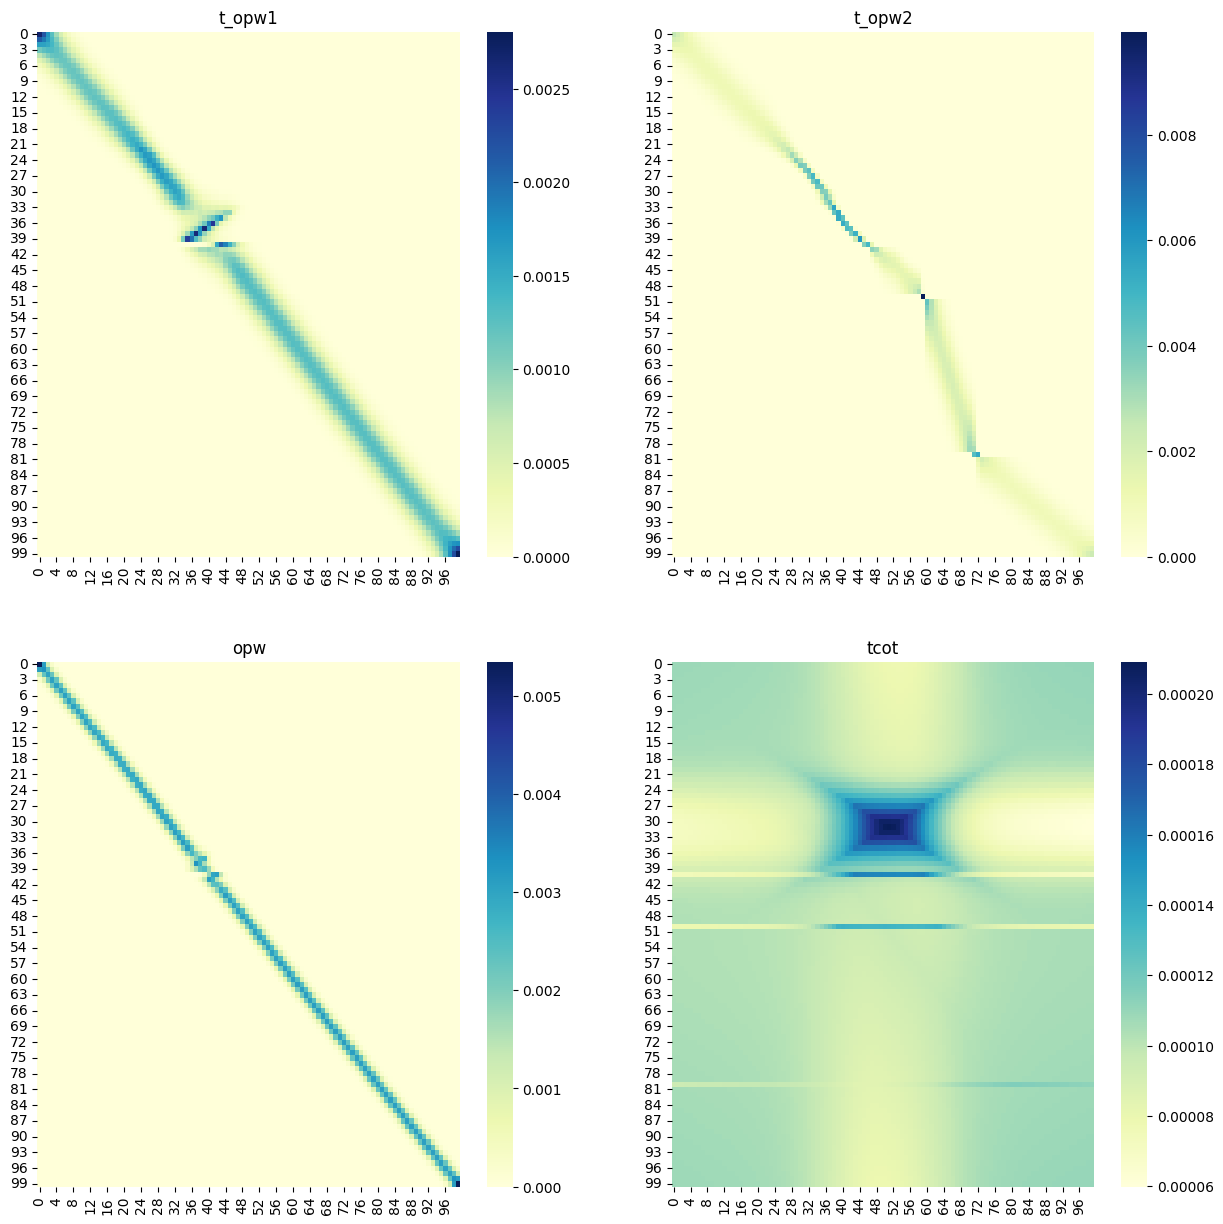

Cost of t_opw1:  0.2786027766252064
Cost of t_opw2:  0.28040598630259655
Cost of opw:  0.3010278151642343
Cost of tcot:  0.34901374303209637


In [21]:
ot_uniform_prior(y1,y2)

### Dữ liệu tự tạo

In [22]:
y1 = np.array([-10,1, 4, 3, 6, 5, 8, 7,-5, 7.5])
y2 = np.array([4, 1,20,20, 3, 6, 7, 5, 8, 7.5])

# y1 = (y1 - np.min(y1))/(np.max(y1) - np.min(y1))

# y2 = (y2 - np.mean(y2))/np.std(y2)

In [23]:
y1_trend = l1filter(y1,1)
y2_trend = l1filter(y2,1)

y1_res = y1 - y1_trend
y2_res = y2 - y2_trend

y1_prob = res2prob(y1_res).reshape(-1,1)
y2_prob = res2prob(y2_res).reshape(-1,1)

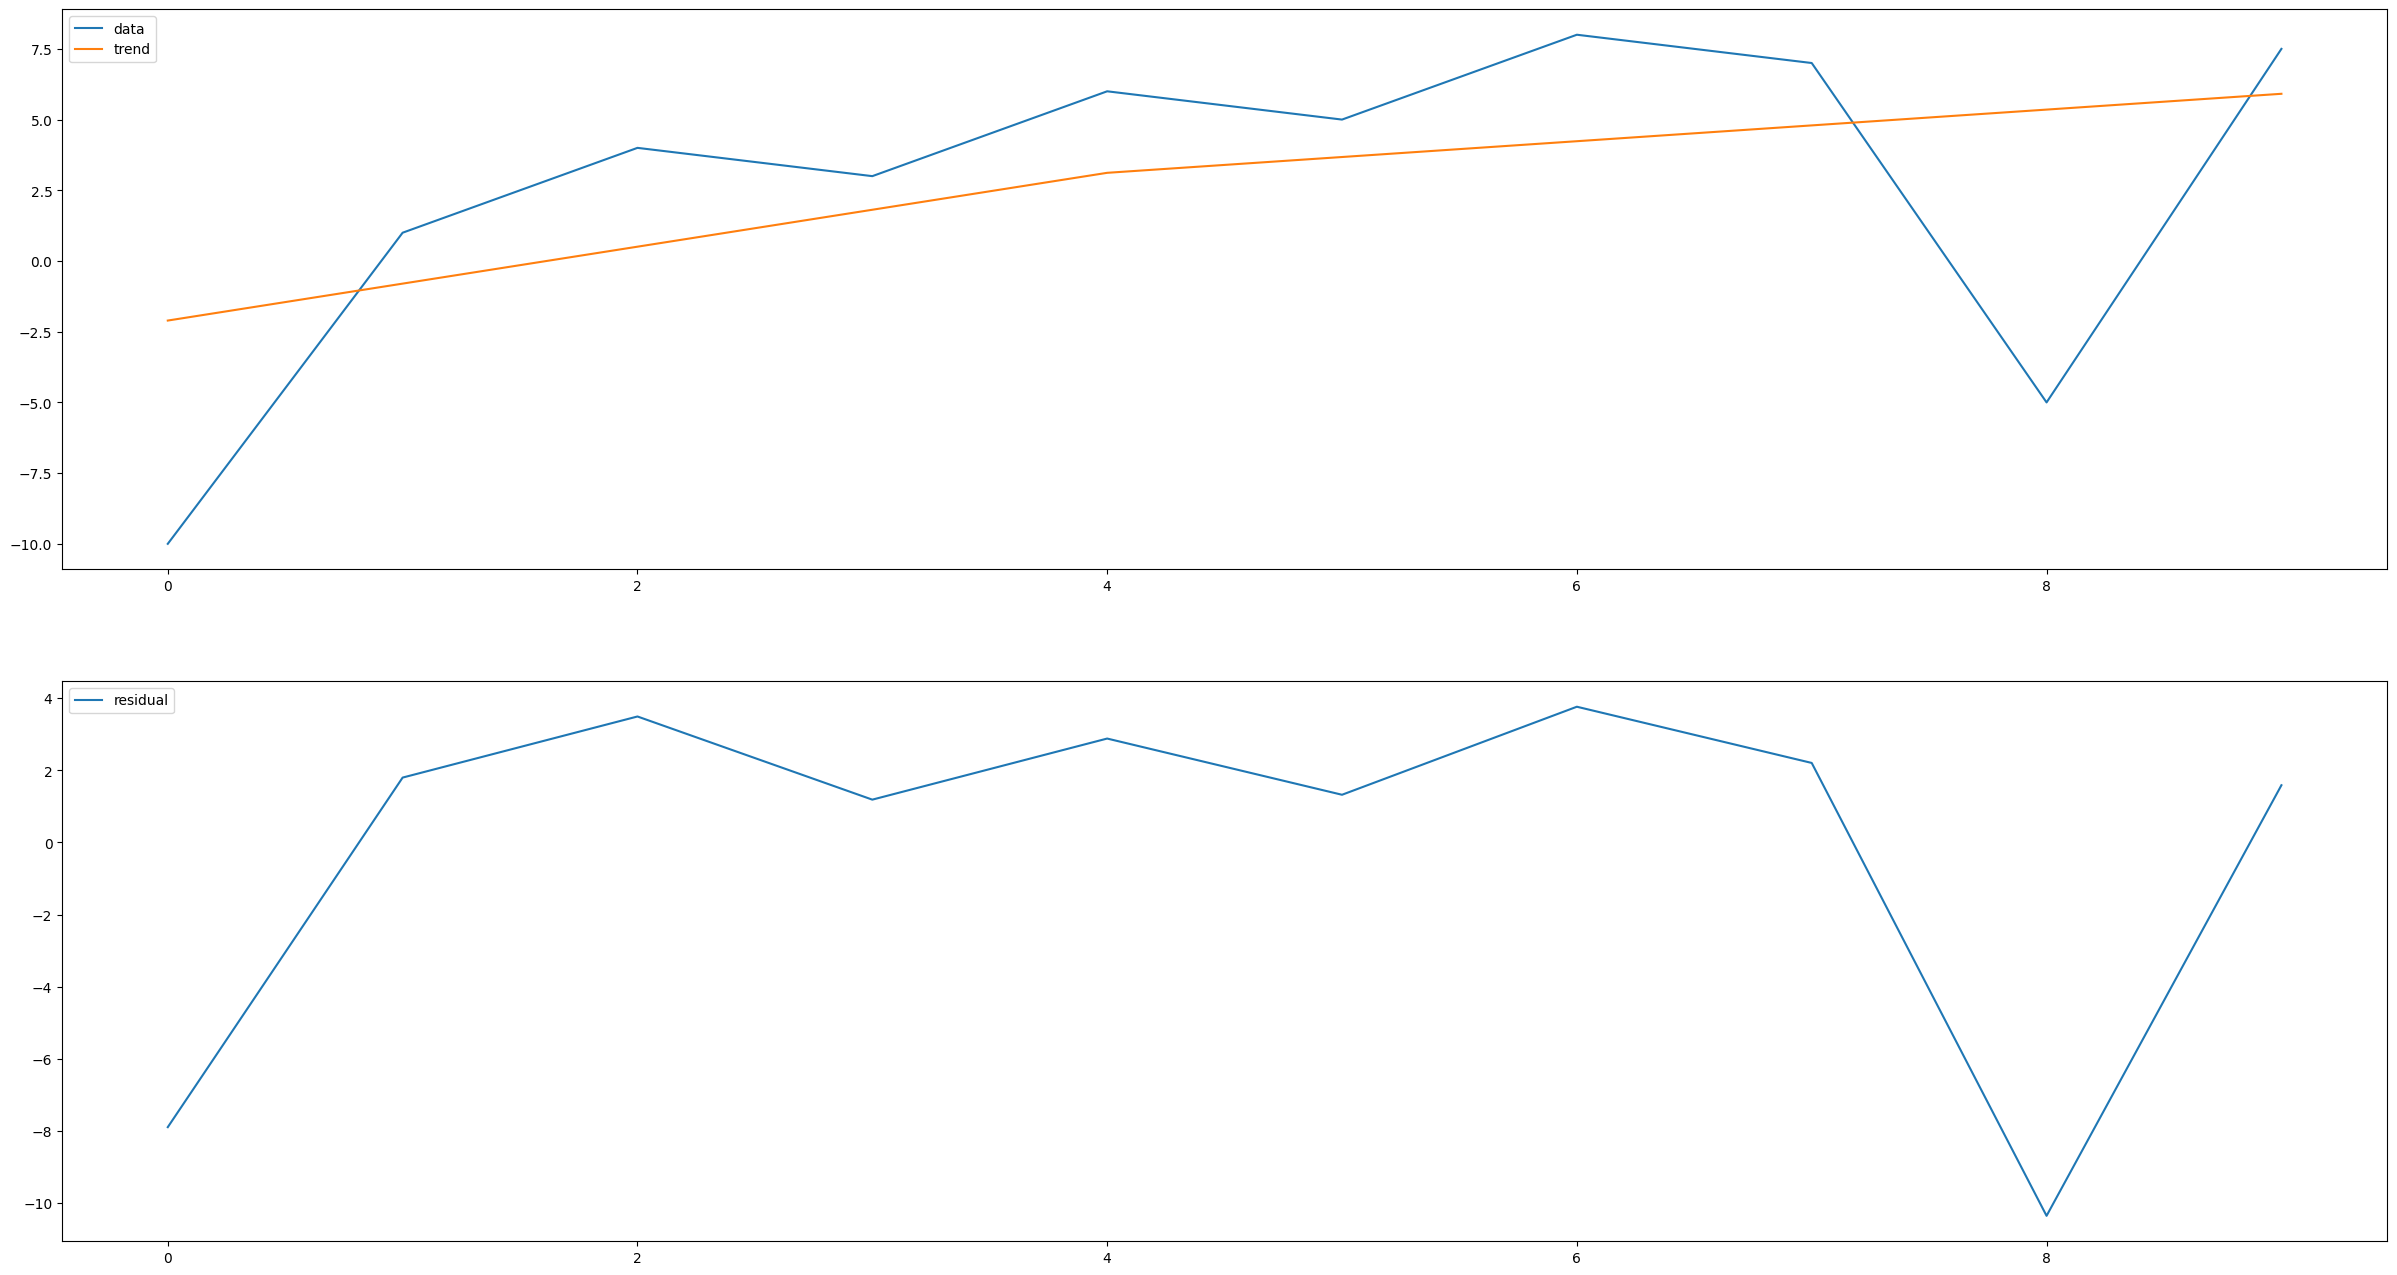

In [24]:
visualize(y1,y1_trend)

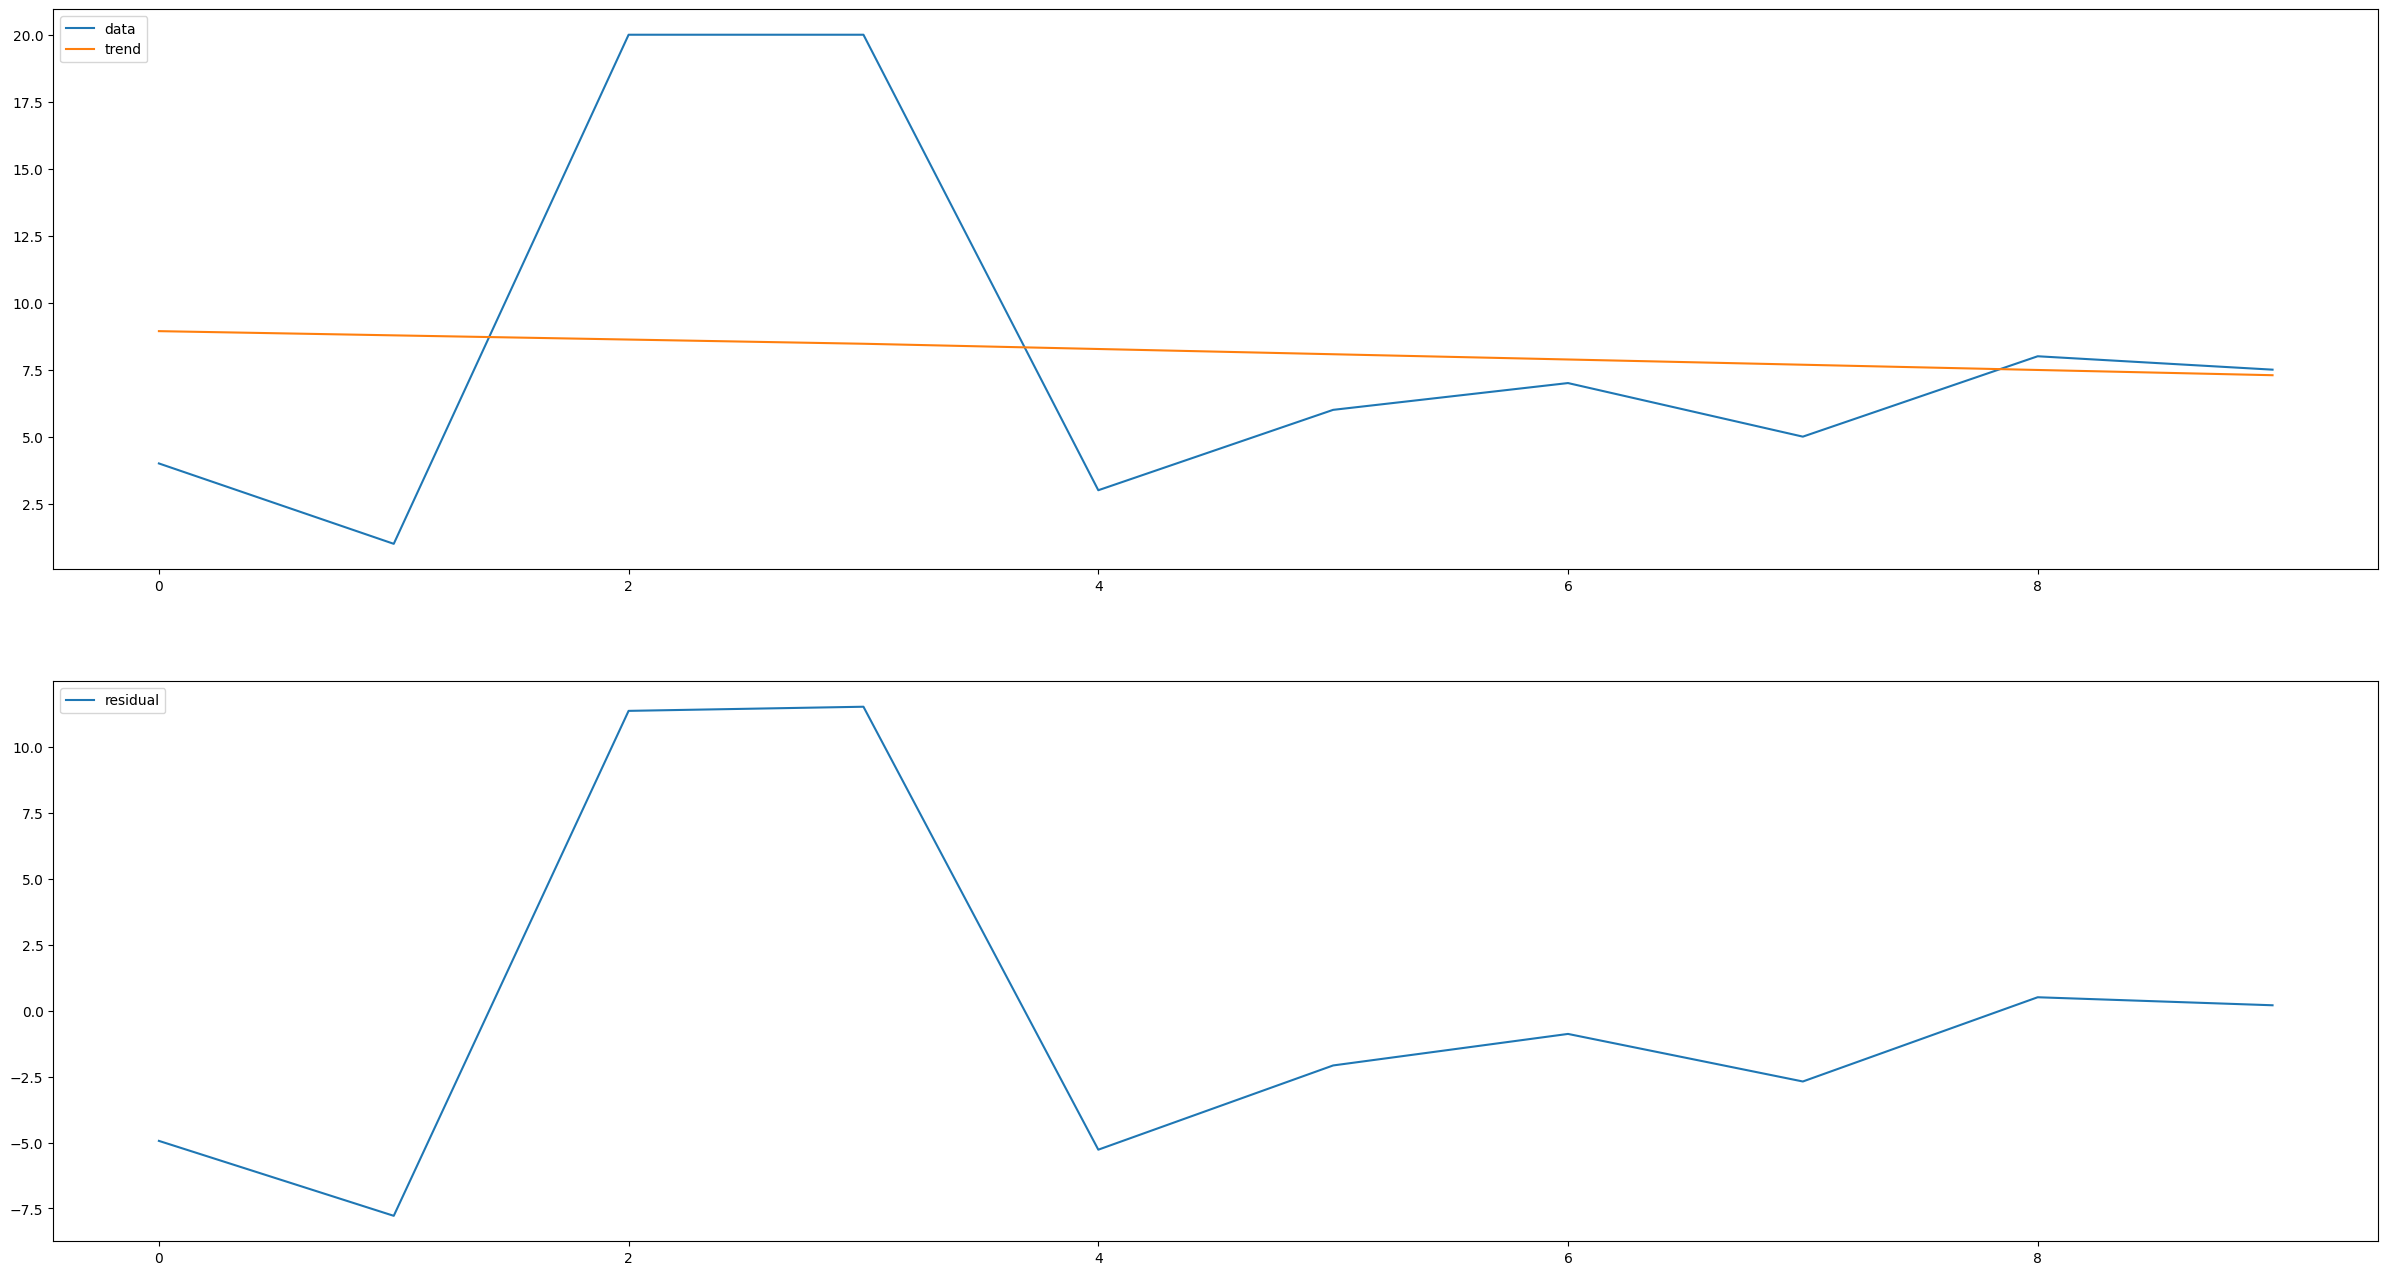

In [25]:
visualize(y2,y2_trend)

In [26]:
y1_prob.round(3)

array([[0.007],
       [0.143],
       [0.061],
       [0.194],
       [0.083],
       [0.181],
       [0.053],
       [0.117],
       [0.002],
       [0.159]])

In [27]:
y2_prob.round(3)

array([[0.027],
       [0.007],
       [0.001],
       [0.001],
       [0.023],
       [0.114],
       [0.207],
       [0.084],
       [0.248],
       [0.289]])

In [28]:
join_prob = y1_prob.dot(y2_prob.T)

<AxesSubplot:>

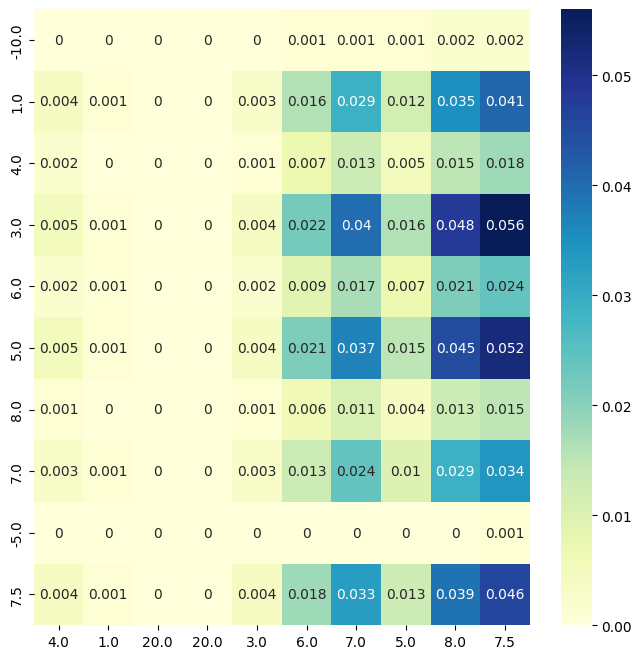

In [29]:
import seaborn as sns 

plt.figure(figsize=(8, 8))
sns.heatmap(join_prob.round(3),cmap="YlGnBu",annot = True,xticklabels=y2.reshape(10,), yticklabels=y1.reshape(10,))

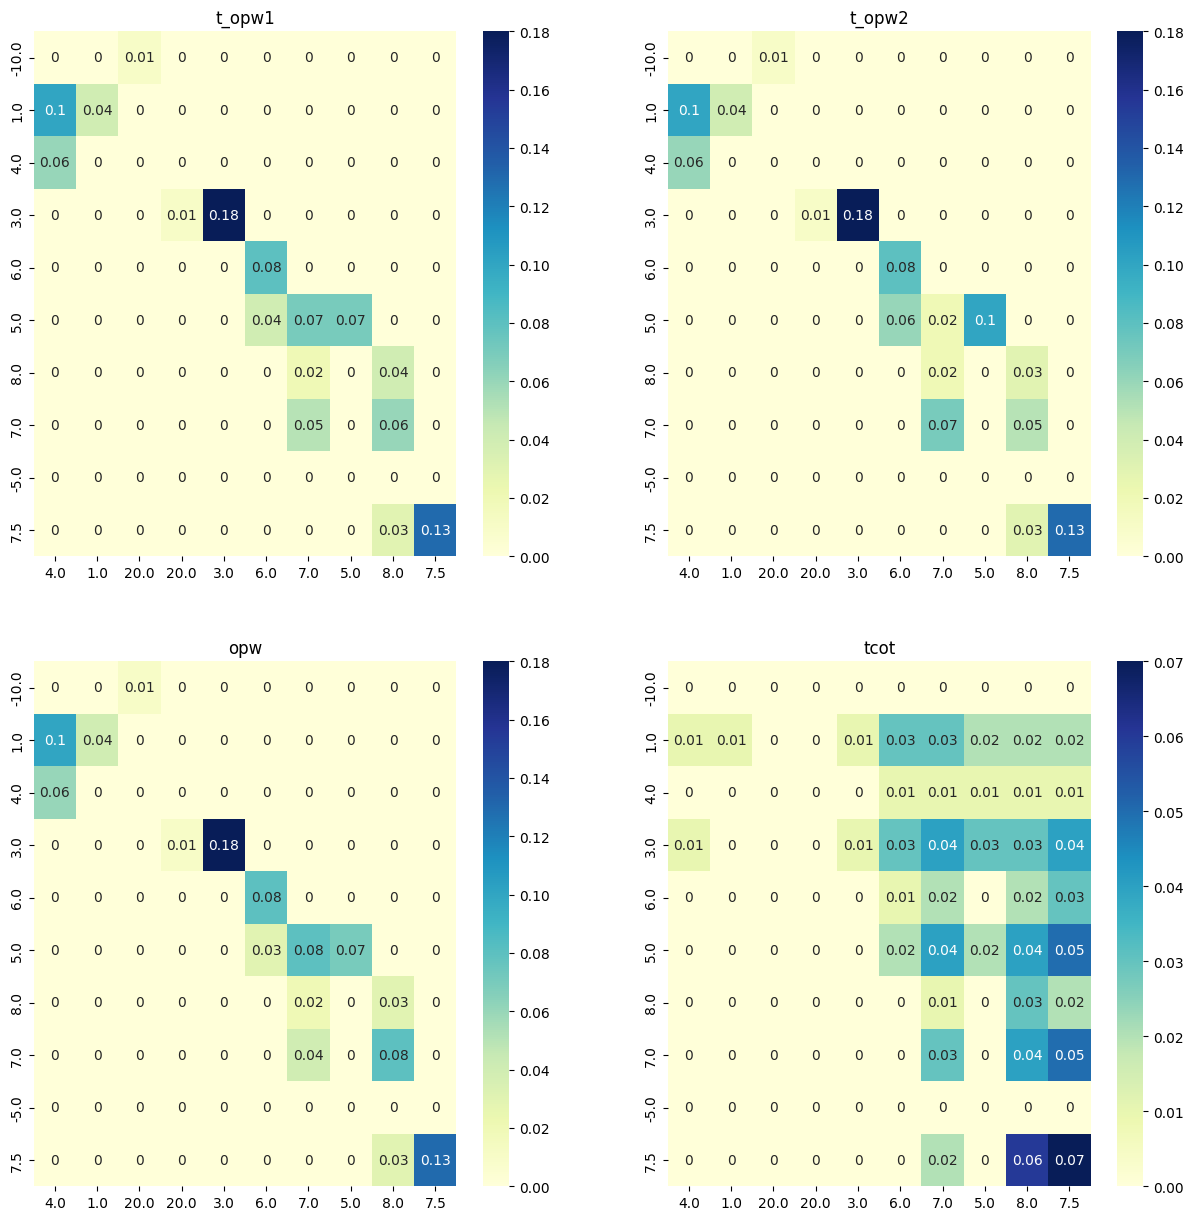

Cost of t_opw1:  0.8805386862235027
Cost of t_opw2:  0.7905423122420394
Cost of opw:  0.9148132791327186
Cost of tcot:  3.2473069079175847


In [30]:

dis1, T1 = t_opw1(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob)
dis2, T2 = t_opw2(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob)
dis3, T3 = opw(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob)
dis4, T4 = tcot(y1.reshape(-1,1), y2.reshape(-1,1), y1_prob, y2_prob, ld=2)

fig, ax = plt.subplots(2,2,figsize=(15,15))

cmap="YlGnBu"

sns.heatmap(T1.round(2), ax=ax[0,0], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)
sns.heatmap(T2.round(2), ax=ax[0,1], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)
sns.heatmap(T3.round(2), ax=ax[1,0], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)
sns.heatmap(T4.round(2), ax=ax[1,1], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)

ax[0,0].set_title("t_opw1")
ax[0,1].set_title("t_opw2")
ax[1,0].set_title("opw")
ax[1,1].set_title("tcot")

plt.show()

print("Cost of t_opw1: ",dis1)
print("Cost of t_opw2: ",dis2)
print("Cost of opw: ",dis3)
print("Cost of tcot: ",dis4)

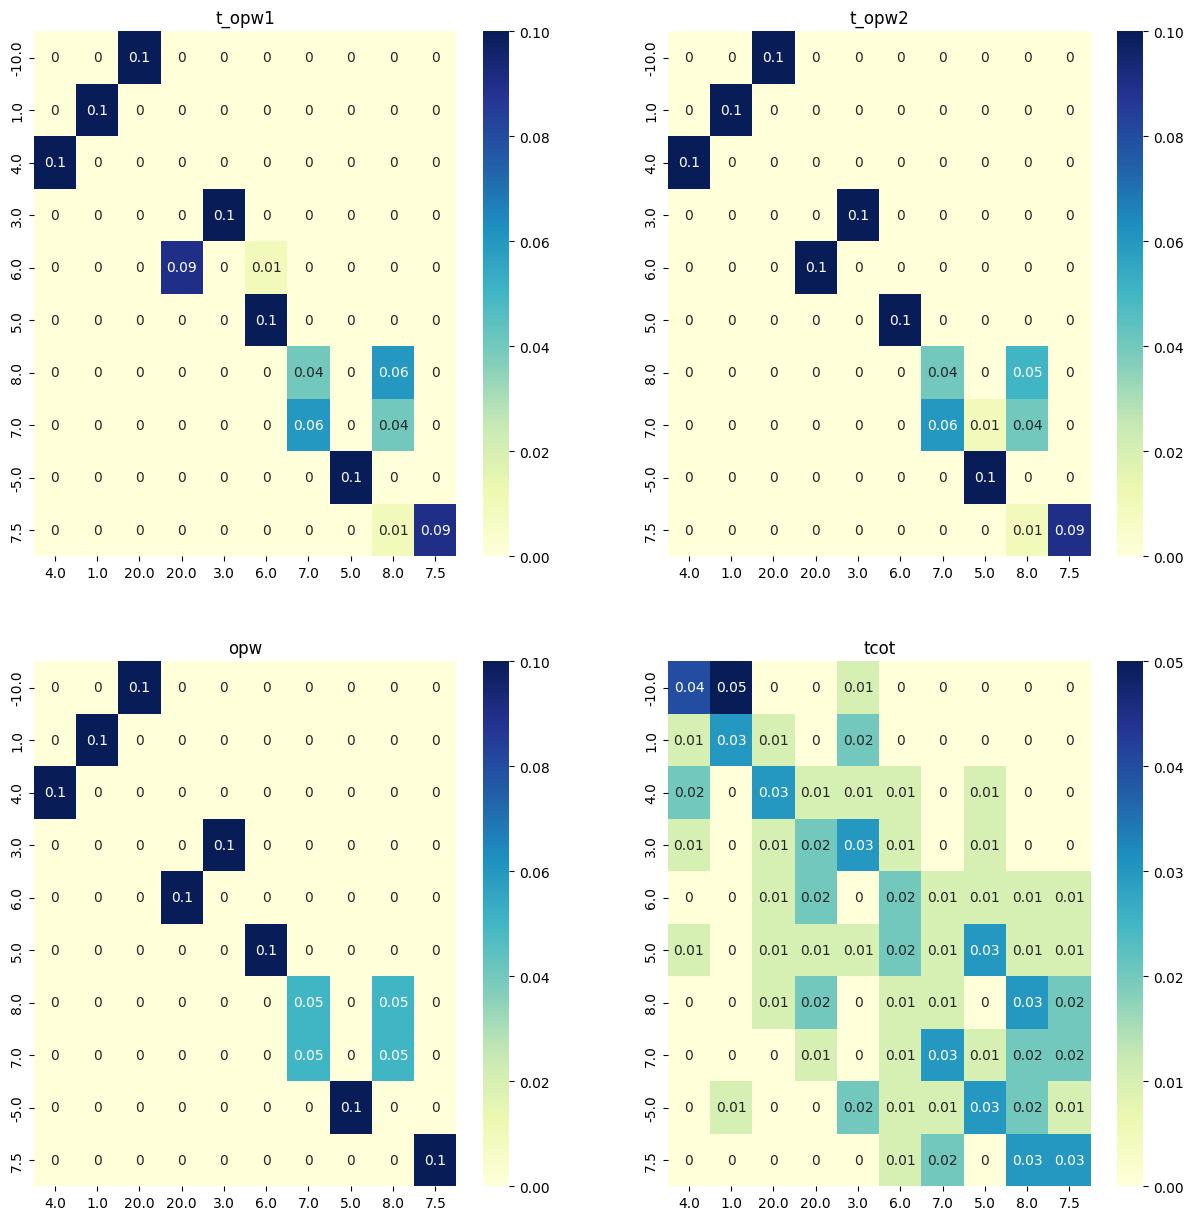

Cost of t_opw1:  4.5634286572877985
Cost of t_opw2:  4.596423191917669
Cost of opw:  4.5777139690376
Cost of tcot:  6.837486891212059


In [31]:
dis1, T1 = t_opw1(y1.reshape(-1,1), y2.reshape(-1,1))
dis2, T2 = t_opw2(y1.reshape(-1,1), y2.reshape(-1,1))
dis3, T3 = opw(y1.reshape(-1,1), y2.reshape(-1,1))
dis4, T4 = tcot(y1.reshape(-1,1), y2.reshape(-1,1), ld=2)

fig, ax = plt.subplots(2,2,figsize=(15,15))

cmap="YlGnBu"

sns.heatmap(T1.round(2), ax=ax[0,0], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)
sns.heatmap(T2.round(2), ax=ax[0,1], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)
sns.heatmap(T3.round(2), ax=ax[1,0], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)
sns.heatmap(T4.round(2), ax=ax[1,1], cmap=cmap,xticklabels=y2.reshape(-1,), yticklabels=y1.reshape(-1,), annot=True)

ax[0,0].set_title("t_opw1")
ax[0,1].set_title("t_opw2")
ax[1,0].set_title("opw")
ax[1,1].set_title("tcot")

plt.show()

print("Cost of t_opw1: ",dis1)
print("Cost of t_opw2: ",dis2)
print("Cost of opw: ",dis3)
print("Cost of tcot: ",dis4)